<a href="https://colab.research.google.com/github/MonikSense/SensrGOSnO2/blob/main/rgosno2SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVR - MSE: 28.24
SVR - R2: 0.89


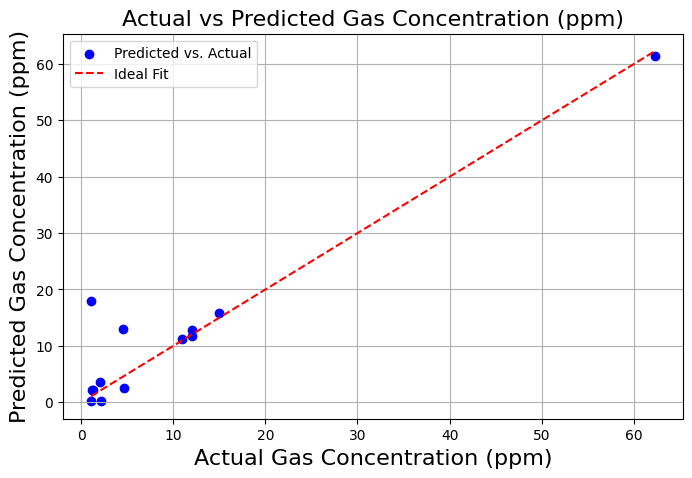

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import requests
from io import StringIO
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/MonikSense/MonikSense/refs/heads/main/rgosno4%20final.CSV")

#OperTemp,Gas Conc (ppm),Sensor Response,Tres,Trec
# Features and target
X = data[[ 'Tres','Gas Conc (ppm)','OperTemp','Trec']]
y = data['Sensor Response']
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Fit SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.9)
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MSE: {mse_svr:.2f}")
print(f"SVR - R2: {r2_svr:.2f}")


# Plot Actual vs Predicted Sensor Response
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svr, color='blue', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Gas Concentration (ppm)", fontsize=16)
plt.ylabel("Predicted Gas Concentration (ppm)", fontsize=16)
plt.title("Actual vs Predicted Gas Concentration (ppm)", fontsize=16)
plt.legend()
plt.grid()
#plt.show()